<a href="https://colab.research.google.com/github/Frankensosege/MachineLearning/blob/main/10MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



pima indian 당뇨병 데이터 가져와 평준화하기



In [1]:
!git clone http://github.com/taehojo/data.git

Cloning into 'data'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 21 (delta 3), reused 20 (delta 2), pack-reused 0
Unpacking objects: 100% (21/21), 460.93 KiB | 4.56 MiB/s, done.


In [21]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/pima-indians-diabetes3.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pregnant   768 non-null    int64  
 1   plasma     768 non-null    int64  
 2   pressure   768 non-null    int64  
 3   thickness  768 non-null    int64  
 4   insulin    768 non-null    int64  
 5   bmi        768 non-null    float64
 6   pedigree   768 non-null    float64
 7   age        768 non-null    int64  
 8   diabetes   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
X = df.iloc[:, 0:8]
X.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [9]:
y = df.iloc[:, 8]

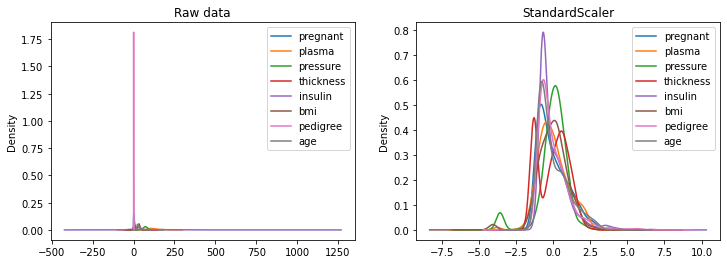

In [11]:
ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
X.plot(kind='kde', title='Raw data', ax=ax[0])
scaled_X.plot(kind='kde', title='StandardScaler', ax=ax[1])
plt.show()

In [15]:
x_train, x_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.25, random_state=0)

In [16]:
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(576, 8) (192, 8) (576,) (192,)


In [27]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)
print(lr.score(x_train, y_train))
print(lr.score(x_test, y_test))

y_pred = lr.predict(x_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=lr, X=x_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

0.2925622759955967
0.32396837377325394
Accuracy: 26.94 %
Standard Deviation: 13.51 %


결정트리 분류

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=dt, X=x_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 69.10 %
Standard Deviation: 3.35 %


랜덤포레스트 분류

In [24]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=rf, X=x_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 73.77 %
Standard Deviation: 5.18 %


가우시안 나이브 베이즈</p>
https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

In [25]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train, y_train)

y_pred = gnb.predict(x_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=gnb, X=x_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.34 %
Standard Deviation: 5.08 %


K-최근접 이웃 분류

In [26]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(x_train, y_train)

y_pred = kn.predict(x_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=kn, X=x_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 72.40 %
Standard Deviation: 3.24 %


에이다 부스트</p>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

In [28]:
from sklearn.ensemble import AdaBoostClassifier

ab = AdaBoostClassifier()
ab.fit(x_train, y_train)

y_pred = ab.predict(x_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=ab, X=x_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 74.48 %
Standard Deviation: 3.13 %


이차판별분석</p>
https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html

In [29]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

y_pred = qda.predict(x_test)

skf = StratifiedKFold(n_splits=10, shuffle=True)
accuracies = cross_val_score(estimator=qda, X=x_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 72.04 %
Standard Deviation: 4.15 %


서포트 벡터 머신